## Deskriptivna analiza dataseta i preporuke filmova pomoću user-user Collaburative-filterninga
### Implementirane dvije metode sličnosti korisnika -> Euklidean-Distance i Pearson

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Više izlaznih linija
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

movies = pd.read_csv('ml-latest/movies.csv')
movies.head()

ratings = pd.read_csv('ml-latest/ratings.csv',usecols=['userId','movieId','rating'])
ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


Broj filmova u datasetu.

In [2]:
movies['movieId'].count()

58098

Statistika o ocjenama filmova.

In [3]:
ratings['rating'].describe(include='all')

count    2.775344e+07
mean     3.530445e+00
std      1.066353e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Histogram ocjena i njihovog broja u datasetu.

rating
0.5    23000
1.0    20676
1.5    19659
2.0    26739
2.5    30299
3.0    37109
3.5    34753
4.0    32255
4.5    23587
5.0    24209
Name: movieId, dtype: int64

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

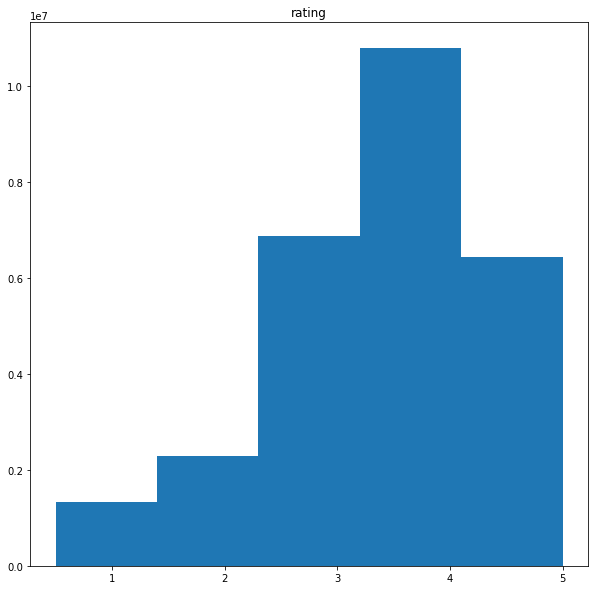

In [4]:
ratings.groupby('rating')['movieId'].nunique()

ratings.hist(column='rating',figsize=(10,10),bins=5,grid=False)

Izbacivanje filmova bez žanra i ispis broja filmova po žanru.

In [5]:
genre_filter = (movies['genres'] == '(no genres listed)')

movies = movies[~genre_filter]
movies=movies.reset_index(drop=True)

genres_count = {}
for row in range(movies['movieId'].count()):
    for genre in movies['genres'][row].split("|"):
        if genre!='':
            genres_count[genre]=genres_count.get(genre,0)+1

genres_count

{'Adventure': 4067,
 'Animation': 2663,
 'Children': 2749,
 'Comedy': 15956,
 'Fantasy': 2637,
 'Romance': 7412,
 'Drama': 24144,
 'Action': 7130,
 'Crime': 5105,
 'Thriller': 8216,
 'Horror': 5555,
 'Mystery': 2773,
 'Sci-Fi': 3444,
 'IMAX': 197,
 'Documentary': 5118,
 'War': 1820,
 'Musical': 1113,
 'Western': 1378,
 'Film-Noir': 364}

Histogram žanr, broj filmova u žanru.

<BarContainer object of 19 artists>

([<matplotlib.axis.YTick at 0x1e88838bac0>,
 [Text(0, 0, 'Adventure'),
  Text(0, 1, 'Animation'),
  Text(0, 2, 'Children'),
  Text(0, 3, 'Comedy'),
  Text(0, 4, 'Fantasy'),
  Text(0, 5, 'Romance'),
  Text(0, 6, 'Drama'),
  Text(0, 7, 'Action'),
  Text(0, 8, 'Crime'),
  Text(0, 9, 'Thriller'),
  Text(0, 10, 'Horror'),
  Text(0, 11, 'Mystery'),
  Text(0, 12, 'Sci-Fi'),
  Text(0, 13, 'IMAX'),
  Text(0, 14, 'Documentary'),
  Text(0, 15, 'War'),
  Text(0, 16, 'Musical'),
  Text(0, 17, 'Western'),
  Text(0, 18, 'Film-Noir')])

Text(0.5, 0, 'Broj Filmova')

Text(0.5, 1.0, 'Popularnost žanrova')

Text(4087, 0.1, '4067')

Text(2683, 1.1, '2663')

Text(2769, 2.1, '2749')

Text(15976, 3.1, '15956')

Text(2657, 4.1, '2637')

Text(7432, 5.1, '7412')

Text(24164, 6.1, '24144')

Text(7150, 7.1, '7130')

Text(5125, 8.1, '5105')

Text(8236, 9.1, '8216')

Text(5575, 10.1, '5555')

Text(2793, 11.1, '2773')

Text(3464, 12.1, '3444')

Text(217, 13.1, '197')

Text(5138, 14.1, '5118')

Text(1840, 15.1, '1820')

Text(1133, 16.1, '1113')

Text(1398, 17.1, '1378')

Text(384, 18.1, '364')

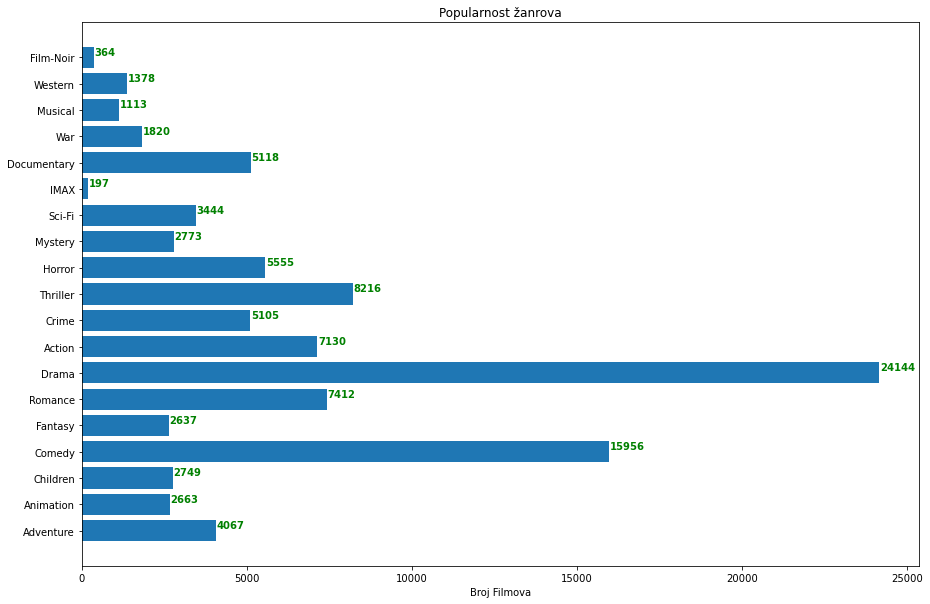

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(range(len(genres_count)),genres_count.values())
plt.yticks(range(len(genres_count)),list(genres_count.keys()))
plt.xlabel('Broj Filmova')
plt.title("Popularnost žanrova")
for i, v in enumerate(genres_count.values()):
    ax.text(v + 20, i + .10, v, color='green', fontweight='bold')

Metoda za računanje euclidian-distance između dvije osobe.

TODO FORMULA U LATEX

In [7]:
def euclidean_distance(person1,person2):
    df_first = ratings.loc[ratings['userId']==person1]
    df_second = ratings.loc[ratings['userId']==person2]

    df = pd.merge(df_first,df_second,how='inner',on='movieId')

    if len(df)==0:return 0

    sum_of_squares = sum(pow((df['rating_x']-df['rating_y']),2))
    return 1/(1+sum_of_squares)

euclidean_distance(1,1)

1.0

Metoda za računanje pearson scorea izmežu dvije osobe.

LATEX FORMULA TODO

In [8]:
def pearson_score(person1,person2):

    #Get detail for Person1 and Person2
    df_first= ratings.loc[ratings.userId==person1]
    df_second= ratings.loc[ratings.userId==person2]

    # Getting mutually rated items
    df= pd.merge(df_first,df_second,how='inner',on='movieId')

    # If no rating in common
    n=len(df)
    if n==0: return 0

    #Adding up all the ratings
    sum1=sum(df['rating_x'])
    sum2=sum(df['rating_y'])

    ##Summing up squares of ratings
    sum1_square= sum(pow(df['rating_x'],2))
    sum2_square= sum(pow(df['rating_y'],2))

    # sum of products
    product_sum= sum(df['rating_x']*df['rating_y'])

    ## Calculating Pearson Score
    numerator= product_sum - (sum1*sum2/n)
    denominator=sqrt((sum1_square- pow(sum1,2)/n) * (sum2_square - pow(sum2,2)/n))
    if denominator==0: return 0

    r=numerator/denominator

    return r
#Očekujemo 1 jer su iste osobe
pearson_score(1,1)

1.0

Metoda koja će vratiti vratiti n najsličnijih osoba osobe koja se zada u parametru.

In [10]:
#Pomoćna metoda koja pronalazi sve ostale osobe
def findOthers(personId):
    myset = set()
    for otherPerson in ratings.loc[ratings['userId']!=personId]['userId'].unique():
        myset.add(otherPerson)

    return myset

In [ ]:
def topMatches(personId,n=5,similarity=pearson_score):
    # scores = []
    # for user in findOthers(personId):
    #     scores.append((similarity(personId,user),user))
    #
    # scores.sort(reverse=True)
    # return scores[0:n]

    frame = {'userId': ratings.loc[ratings['userId']!=personId]['userId'].unique(), 'similarity': 0}
    df = pd.DataFrame(frame)
    df['similarity'] = df['userId'].apply(lambda x: similarity(x,personId))
    df = df.sort_values(by='similarity',ascending=False)

    return df.head(n)


topMatches(1)

Metoda koja za zadanu osobu traži i vraća imena preporučenih filmova.

In [11]:
def getRecomendation(personId, similarity=pearson_score):

    totals,simSums = {},{}

    df_person = ratings.loc[ratings.userId==personId]

    for otherId in findOthers(personId):
        sim = similarity(personId,otherId)
        if sim<=0 : continue

        df_other = ratings.loc[ratings.userId == otherId]

        # Oni filmovi koje user personId nije pogledao
        movie = df_other[~df_other.isin(df_person).all(1)]

        for (movieid,rating) in (np.array(movie[['movieId','rating']])):
            totals.setdefault(movieid,0)
            totals[movieid]+=rating*sim

            simSums.setdefault(movieid,0)
            simSums[movieid]+=sim

        ranking = [(t/simSums[item],item) for item,t in totals.items()]

        ranking.sort()
        ranking.reverse()

        recomendedId = np.array([x[1] for x in ranking])

        return np.array(movies[movies['movieId'].isin(recomendedId)]['title'])[:20]

Preporuke filmova osobi sa id 1 i osobi s id 500.

In [12]:
getRecomendation(1)

getRecomendation(500)


array(['Toy Story (1995)', 'Jumanji (1995)',
       'Father of the Bride Part II (1995)', 'Heat (1995)',
       'GoldenEye (1995)', 'American President, The (1995)',
       'Casino (1995)', 'Ace Ventura: When Nature Calls (1995)',
       'Money Train (1995)', 'Assassins (1995)',
       'Leaving Las Vegas (1995)', 'Dangerous Minds (1995)',
       'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'Babe (1995)',
       'Dead Man Walking (1995)', 'Clueless (1995)', 'Richard III (1995)',
       'Mortal Kombat (1995)', 'To Die For (1995)',
       'Seven (a.k.a. Se7en) (1995)'], dtype=object)

array(['Toy Story (1995)', 'Jumanji (1995)',
       'Father of the Bride Part II (1995)', 'Heat (1995)',
       'GoldenEye (1995)', 'American President, The (1995)',
       'Casino (1995)', 'Ace Ventura: When Nature Calls (1995)',
       'Money Train (1995)', 'Assassins (1995)',
       'Leaving Las Vegas (1995)', 'Dangerous Minds (1995)',
       'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'Babe (1995)',
       'Dead Man Walking (1995)', 'Clueless (1995)', 'Richard III (1995)',
       'Mortal Kombat (1995)', 'To Die For (1995)',
       'Seven (a.k.a. Se7en) (1995)'], dtype=object)